In [1]:
sim_dirs_ls_output = """1590872439-fall-nominal-withtest-expected_contacts_per_day
drwxrwxr-x  19 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-june-nominal-notest-expected_contacts_per_day
drwxrwxr-x  19 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-fall-nominal-notest-expected_contacts_per_day
drwxrwxr-x  16 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-june-nominal-notest-mild_symptoms_daily_self_report_p
drwxrwxr-x  18 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-fall-nominal-notest-contact_tracing_isolations
drwxrwxr-x  18 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-fall-nominal-withtest-contact_tracing_isolations
drwxrwxr-x  18 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-june-nominal-notest-contact_tracing_isolations
drwxrwxr-x  16 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-fall-nominal-withtest-mild_symptoms_daily_self_report_p
drwxrwxr-x  16 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-fall-nominal-notest-mild_symptoms_daily_self_report_p
drwxrwxr-x  13 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-fall-nominal-notest-initial_ID_prevalence
drwxrwxr-x  13 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-fall-nominal-withtest-initial_ID_prevalence
drwxrwxr-x  13 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-june-nominal-notest-initial_ID_prevalence
drwxrwxr-x  12 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-fall-nominal-notest-exposed_infection_p
drwxrwxr-x  13 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-fall-nominal-withtest-test_protocol_QFNR
drwxrwxr-x  12 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-june-nominal-notest-severe_symptoms_daily_self_report_p
drwxrwxr-x  12 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-fall-nominal-notest-severe_symptoms_daily_self_report_p
drwxrwxr-x  12 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-fall-nominal-withtest-test_population_fraction
drwxrwxr-x  12 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-fall-nominal-withtest-exposed_infection_p
drwxrwxr-x  11 jmc678 pug-jmc678   287 May 30 17:00 1590872439-fall-nominal-withtest-asymptomatic_p
drwxrwxr-x  11 jmc678 pug-jmc678   287 May 30 17:00 1590872439-june-nominal-notest-asymptomatic_p
drwxrwxr-x  11 jmc678 pug-jmc678   287 May 30 17:00 1590872439-fall-nominal-notest-asymptomatic_p
drwxrwxr-x  10 jmc678 pug-jmc678   290 May 30 17:00 1590872439-fall-nominal-withtest-contact_tracing_delay
drwxrwxr-x  10 jmc678 pug-jmc678   290 May 30 17:00 1590872439-june-nominal-notest-contact_tracing_delay
drwxrwxr-x  10 jmc678 pug-jmc678   290 May 30 17:00 1590872439-fall-nominal-notest-contact_tracing_delay
drwxrwxr-x  12 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-fall-nominal-withtest-severe_symptoms_daily_self_report_p
drwxrwxr-x  12 jmc678 pug-jmc678  4096 May 30 17:00 1590872439-june-nominal-notest-exposed_infection_p""".split('\n')
sim_dirs = [ls_output.split(' ')[-1] for ls_output in sim_dirs_ls_output]
for d in sim_dirs:
    print(d)

1590872439-fall-nominal-withtest-expected_contacts_per_day
1590872439-june-nominal-notest-expected_contacts_per_day
1590872439-fall-nominal-notest-expected_contacts_per_day
1590872439-june-nominal-notest-mild_symptoms_daily_self_report_p
1590872439-fall-nominal-notest-contact_tracing_isolations
1590872439-fall-nominal-withtest-contact_tracing_isolations
1590872439-june-nominal-notest-contact_tracing_isolations
1590872439-fall-nominal-withtest-mild_symptoms_daily_self_report_p
1590872439-fall-nominal-notest-mild_symptoms_daily_self_report_p
1590872439-fall-nominal-notest-initial_ID_prevalence
1590872439-fall-nominal-withtest-initial_ID_prevalence
1590872439-june-nominal-notest-initial_ID_prevalence
1590872439-fall-nominal-notest-exposed_infection_p
1590872439-fall-nominal-withtest-test_protocol_QFNR
1590872439-june-nominal-notest-severe_symptoms_daily_self_report_p
1590872439-fall-nominal-notest-severe_symptoms_daily_self_report_p
1590872439-fall-nominal-withtest-test_population_fractio

In [2]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")

from analysis_helpers import poisson_waiting_function, \
                            run_multiple_trajectories, \
                            plot_aip_vs_t, \
                            plot_cip_vs_t, \
                            run_sensitivity_sims, \
                            extract_cips, \
                            load_sim_dir

In [3]:
sim_results = {}
for d in sim_dirs:
    parts = d.split('-')
    when = parts[1]
    assn = parts[2]
    tested = parts[3]
    var = parts[4]
    
    if var not in sim_results:
        sim_results[var] = {}
    
    sim_results[var][(when, assn, tested)] = load_sim_dir("/nfs01/covid_sims/" + d, verbose=False)
    print("done loading {}".format(d))

done loading 1590872439-fall-nominal-withtest-expected_contacts_per_day
done loading 1590872439-june-nominal-notest-expected_contacts_per_day
done loading 1590872439-fall-nominal-notest-expected_contacts_per_day
done loading 1590872439-june-nominal-notest-mild_symptoms_daily_self_report_p
done loading 1590872439-fall-nominal-notest-contact_tracing_isolations
done loading 1590872439-fall-nominal-withtest-contact_tracing_isolations
done loading 1590872439-june-nominal-notest-contact_tracing_isolations
done loading 1590872439-fall-nominal-withtest-mild_symptoms_daily_self_report_p
done loading 1590872439-fall-nominal-notest-mild_symptoms_daily_self_report_p
done loading 1590872439-fall-nominal-notest-initial_ID_prevalence
done loading 1590872439-fall-nominal-withtest-initial_ID_prevalence
done loading 1590872439-june-nominal-notest-initial_ID_prevalence
done loading 1590872439-fall-nominal-notest-exposed_infection_p
done loading 1590872439-fall-nominal-withtest-test_protocol_QFNR
done loa

# plotting code

In [41]:
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

def modify_tick_labels(labels, axis, use_int_labels):
    assert(axis in ['x', 'y'])
    new_labels = []
    for label in labels:
        txt = label.get_text()
        if txt == '':
            new_labels.append('')
        else: 
            if axis == 'x':
                val = label._x
            else:
                val = label._y
            
            if use_int_labels:
                newtxt = str(int(val))
            else:
                newtxt = str(float(val))
            
            new_labels.append(newtxt)
    return new_labels
            

def extract_severities(dfs, hospitalizations_only=True):
    severities = []
    for df in dfs:
        all_cols = set(df.columns)
        new_cols = set(['cumulative_mild', 
                        'cumulative_severe', 
                        'severity_0', 
                        'severity_1', 
                        'severity_2', 
                        'severity_3'])
        main_cols = all_cols - new_cols
        subdf = df[list(main_cols)]
        popsize = sum(subdf.iloc[0])
        
        if hospitalizations_only:
            subdf = df[['severity_2', 'severity_3']]
        else:
            subdf = df[['severity_0', 'severity_1', 'severity_2', 'severity_3']]

        severe = sum(subdf.iloc[subdf.shape[0]-1])
        
        severities.append(100 * severe / popsize)
    return severities
def average_cumulative_severe(dfs):
    severities = []
    for df in dfs:
        all_cols = set(df.columns)
        new_cols = set(['cumulative_mild', 
                        'cumulative_severe', 
                        'severity_0', 
                        'severity_1', 
                        'severity_2', 
                        'severity_3'])
        main_cols = all_cols - new_cols
        subdf = df[list(main_cols)]
        popsize = sum(subdf.iloc[0])
        
        subdf = df[['severity_2', 'severity_3']]
        severe = sum(subdf.iloc[subdf.shape[0]-1])
        
        severities.append(100 * severe / popsize)
    return np.mean(severities)

def avg_cum_severe_quantile(dfs, q_low, q_high):
    severities = extract_severities(dfs)
    return np.quantile(severities, q_low), np.mean(severities), np.quantile(severities, q_high)

def cum_severe_quantiles(dfs, q_low, q_high):
    severities = extract_severities(dfs)
    return np.quantile(severities, q_low), np.quantile(severities, 0.5), np.quantile(severities, q_high)

def cum_infection_quantiles(dfs, q_low, q_high):
    severities = extract_severities(dfs, hospitalizations_only=False)
    return np.quantile(severities, q_low), np.quantile(severities, 0.5), np.quantile(severities, q_high)

def plot_many_dfs(sim_output_dict, yaxisfn, ylabel="", xlabel="", title="", figsize=(10,6)):
    plt.figure(figsize=figsize)
    for sim_label, sim_output in sim_output_dict.items():
        xs = []
        ys = []
        for sim_parameter_name, dfs in sim_output.items():
            # compute x-value assuming that sim_param_name is of form 'varied_param_name.value'
            param_val = float('.'.join(sim_parameter_name.split('.')[1:]))
            xs.append(param_val)
            # yaxisfn is a function that takes in a list of trajectory dataframes and
            # produces an output metric
            ys.append(yaxisfn(dfs))
        plt.plot(xs, ys, marker='o', label=sim_label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='best')
    plt.show()


def truncate(val, y_min, y_max):
    return max(min(val, y_max), y_min)
    
def plot_many_dfs_quantiles(sim_output_dict, yaxisfn, normalize_x_axis, x_log_scale=False, 
                            y_log_scale=False,
                            q_low=0.05, q_high=0.95, 
                            y_min = 0, y_max = 5,
                            ylabel="", xlabel="", title="", 
                            figsize=(10,6), alpha=0.1, color=None, savefig_name = None,
                            use_x_int_labels=False, use_y_int_labels=False):
    # assn: yaxisfn(dfs) returns a tuple (q_low_val, avg, q_high_val)
    epsilon=1e-6
    plt.figure(figsize=figsize)
    if x_log_scale:
        plt.xscale("log")
    if y_log_scale:
        plt.yscale("log")
        #_, _, ymin, _ = plt.axis()
        #plt.ylim(bottom=max(1e-2, ymin))
    else:
        plt.ylim(y_min, y_max)
    
    for sim_label, sim_output in sim_output_dict.items():
        xs = []
        ys = []
        q_low_vals = []
        q_high_vals = []
        for sim_parameter_name, dfs in sim_output.items():
            # compute x-value assuming that sim_param_name is of form 'varied_param_name-value'
            param_val = float(sim_parameter_name.split('-')[-1])
            if normalize_x_axis:
                xs.append(param_val * 100)
            else:
                xs.append(param_val)
            # yaxisfn is a function that takes in a list of trajectory dataframes and
            # produces an output metric
            q_low_val, avg, q_high_val = yaxisfn(dfs, q_low, q_high)
            if not y_log_scale:
                ys.append(truncate(avg, y_min, y_max))
                q_low_vals.append(truncate(q_low_val, y_min, y_max))
                q_high_vals.append(truncate(q_high_val, y_min, y_max))
            else:
                ys.append(avg + epsilon)
                q_low_vals.append(q_low_val + epsilon)
                q_high_vals.append(q_high_val + epsilon)
        
        sorted_points = sorted(zip(xs, ys, q_low_vals, q_high_vals), key=lambda x: x[0])
        xs = [p[0] for p in sorted_points]
        ys = [p[1] for p in sorted_points]
        q_low_vals = [p[2] for p in sorted_points]
        q_high_vals = [p[3] for p in sorted_points]
        
        if color == None:
            plt.plot(xs, ys, marker='o', label=sim_label)
            plt.fill_between(xs, q_low_vals, q_high_vals, alpha=alpha)
        else:
            plt.plot(xs, ys, marker='o', label=sim_label, color=color)
            plt.fill_between(xs, q_low_vals, q_high_vals, alpha=alpha, color=color)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='best')
    
    
    
    plt.draw()
    
    ax = plt.gca()
    
    
    labels = ax.get_xmajorticklabels()
    new_labels = modify_tick_labels(labels, "x", use_x_int_labels)
    ax.set_xticklabels(new_labels)
    
    labels = ax.get_xminorticklabels()
    new_labels = modify_tick_labels(labels, "x", use_x_int_labels)
    ax.set_xticklabels(new_labels, minor=True)
    
    labels = ax.get_ymajorticklabels()
    new_labels = modify_tick_labels(labels, "y", use_y_int_labels)
    ax.set_yticklabels(new_labels)
    
    labels = ax.get_yminorticklabels()
    new_labels = modify_tick_labels(labels, "y", use_y_int_labels)
    ax.set_yticklabels(new_labels, minor=True)
    
    plt.tight_layout()
    if savefig_name:
        plt.savefig("/nfs01/covid_figs/" + savefig_name + ".pdf")
    plt.show()

In [5]:
main_labels = sim_results.keys()
sub_labels = sim_results['june_realistic'].keys()
sub_labels = set(sub_labels) 

KeyError: 'june_realistic'

In [11]:

plot_labels = {
    'daily_contacts': 'Average Contacts per Person per Day',
    'severe_self_reporting': 'Daily Symptomatic Self-Reporting Likelihood(%)',
    'prevalence': 'Initial Prevalence (% of Total Population)',
    'mild_self_reporting': 'Daily Asymptomatic Self-Reporting Likelihood(%)',
    'exposed_infection_p': 'Transmission Likelihood per Contact (%)',
    'contact_isolations': 'Isolations per Contact Trace',
    'contact_delay': 'Contact Trace Delay (Days)',
    'asymptomatic_p': 'Percentage of Cases Asymptomatic (%)'
}

normalize_params = {
    'daily_contacts': False,
    'severe_self_reporting': True,
    'prevalence': True,
    'mild_self_reporting': True,
    'exposed_infection_p': True,
    'contact_isolations': False,
    'contact_delay': False,
    'asymptomatic_p': True,
}

plot_log_scale = {
    'daily_contacts': True,
    'severe_self_reporting': False,
    'prevalence': True,
    'mild_self_reporting': False,
    'exposed_infection_p': True,
    'contact_isolations': False,
    'contact_delay': False,
    'asymptomatic_p': True
}

use_x_int_labels = {
    'daily_contacts': True,
    'severe_self_reporting': True,
    'prevalence': False,
    'mild_self_reporting': True,
    'exposed_infection_p': False,
    'contact_isolations': False,
    'contact_delay': True,
    'asymptomatic_p': False
}

# make sensitivity plots for nominal parameters

In [12]:
for key in sim_results.keys():
    print(key)

expected_contacts_per_day
mild_symptoms_daily_self_report_p
contact_tracing_isolations
initial_ID_prevalence
exposed_infection_p
test_protocol_QFNR
severe_symptoms_daily_self_report_p
test_population_fraction
asymptomatic_p
contact_tracing_delay


In [13]:
key_mapping = {
    'contact_tracing_isolations': 'contact_isolations',
    'expected_contacts_per_day': 'daily_contacts',
    'mild_symptoms_daily_self_report_p': 'mild_self_reporting',
    'severe_symptoms_daily_self_report_p': 'severe_self_reporting',
    'initial_ID_prevalence': 'prevalence',
    'exposed_infection_p': 'exposed_infection_p',
    'asymptomatic_p': 'asymptomatic_p',
    'contact_tracing_delay': 'contact_delay'
}

In [14]:
sim_results['asymptomatic_p'].keys()

dict_keys([('fall', 'nominal', 'withtest'), ('june', 'nominal', 'notest'), ('fall', 'nominal', 'notest')])

In [15]:
sim_results[new_label][('june', 'nominal', 'notest')].keys()

dict_keys(['contact_tracing_isolations-0.3', 'contact_tracing_isolations-0.4', 'contact_tracing_isolations-0.5', 'contact_tracing_isolations-0.6', 'contact_tracing_isolations-0.7', 'contact_tracing_isolations-0.8', 'contact_tracing_isolations-0.9', 'contact_tracing_isolations-1', 'contact_tracing_isolations-1.25', 'contact_tracing_isolations-1.5', 'contact_tracing_isolations-1.75', 'contact_tracing_isolations-2.0', 'contact_tracing_isolations-2.25', 'contact_tracing_isolations-2.5', 'contact_tracing_isolations-2.75', 'contact_tracing_isolations-3'])

In [40]:
sim_results.keys()

dict_keys(['expected_contacts_per_day', 'mild_symptoms_daily_self_report_p', 'contact_tracing_isolations', 'initial_ID_prevalence', 'exposed_infection_p', 'test_protocol_QFNR', 'severe_symptoms_daily_self_report_p', 'test_population_fraction', 'asymptomatic_p', 'contact_tracing_delay'])

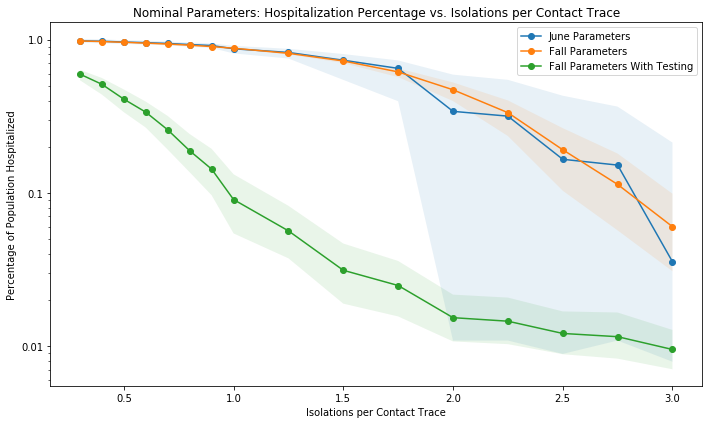

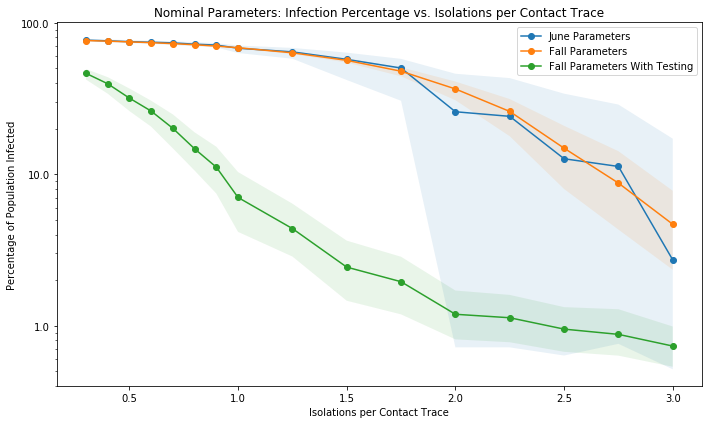

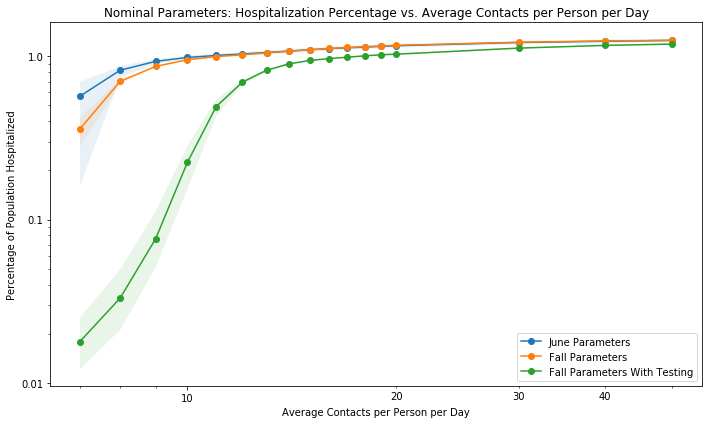

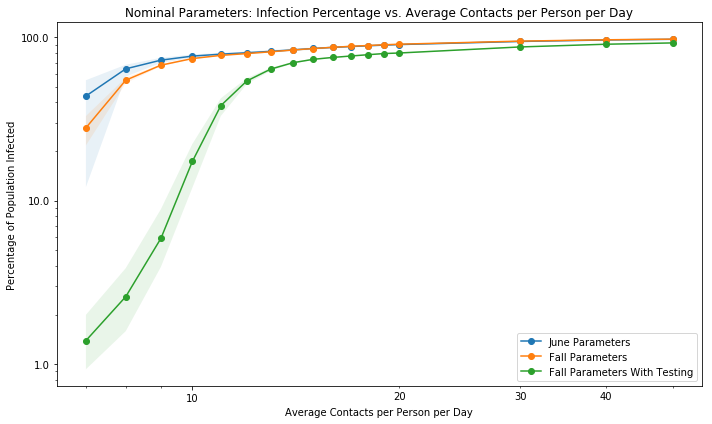

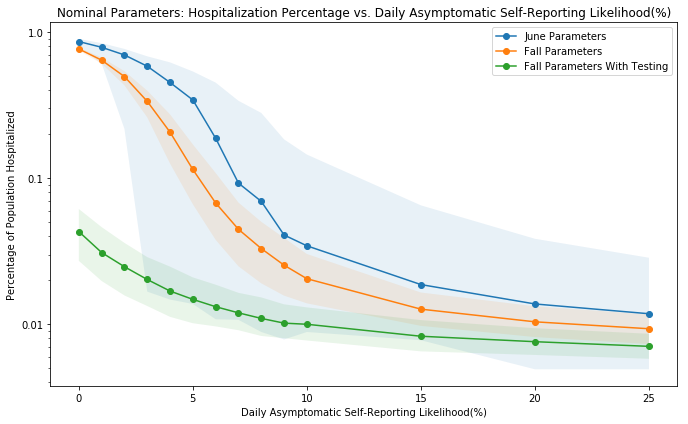

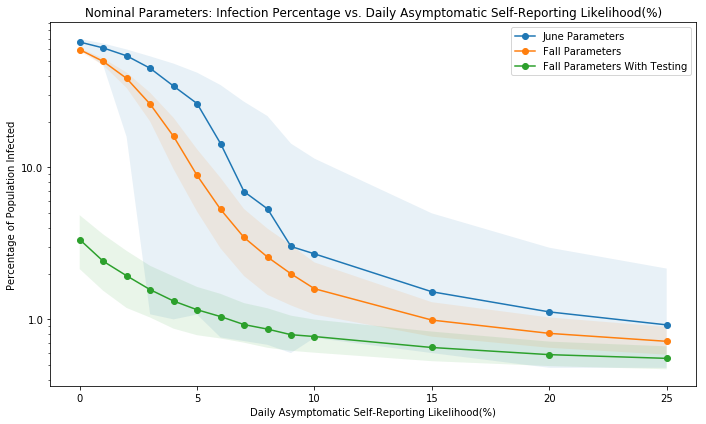

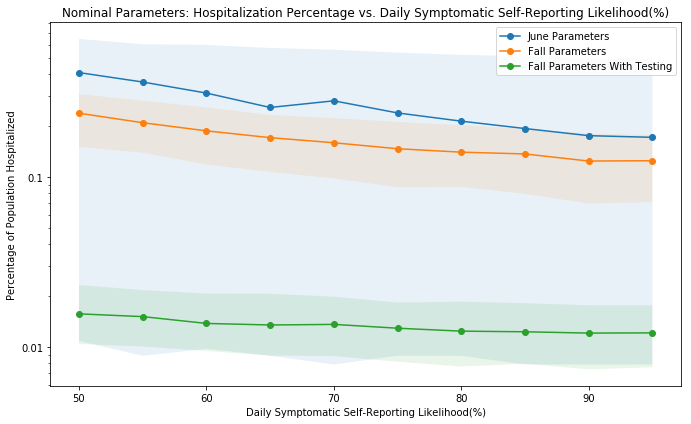

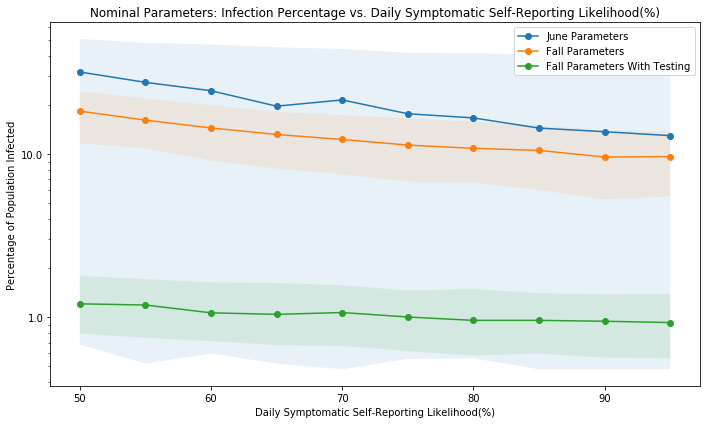

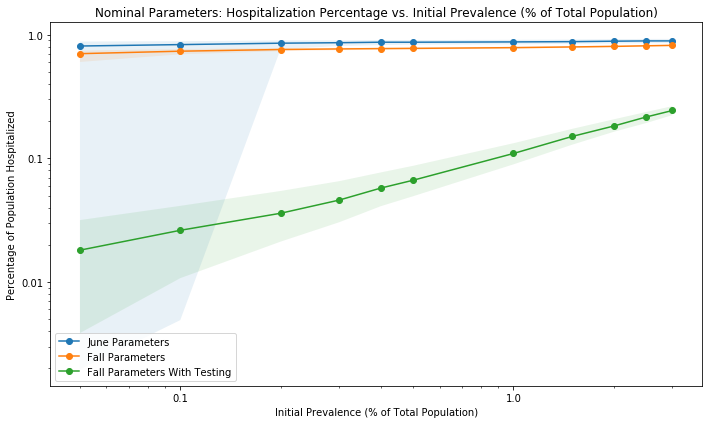

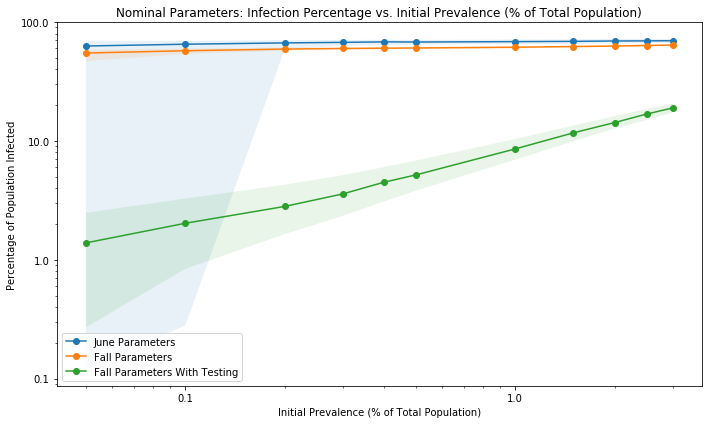

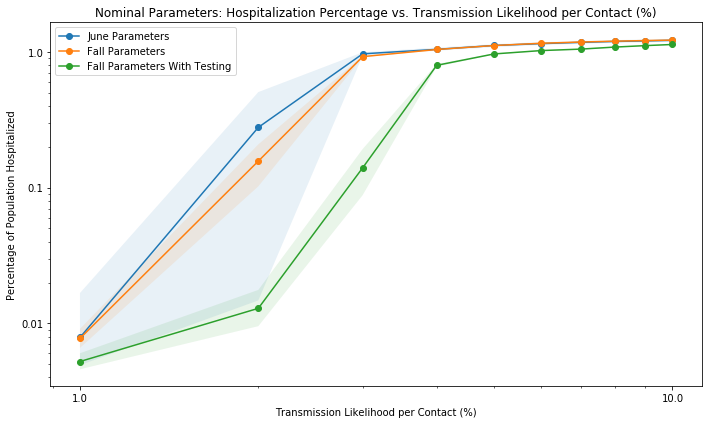

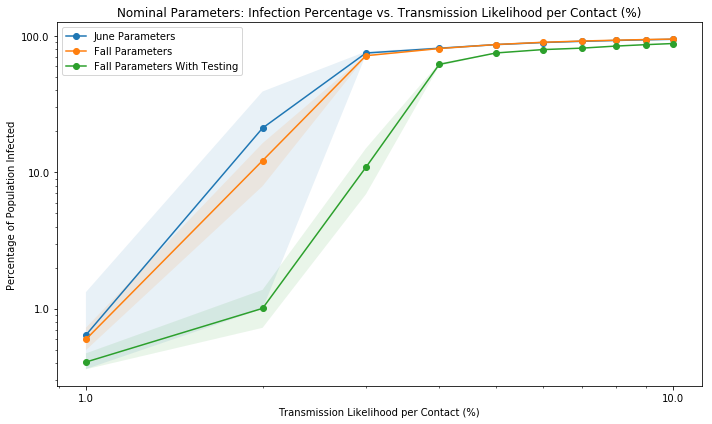

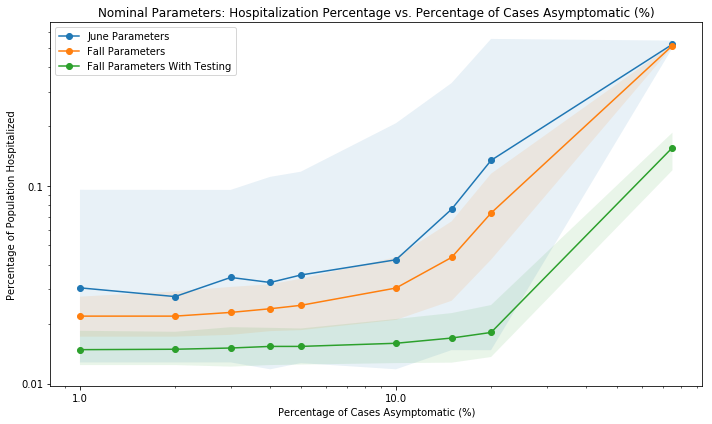

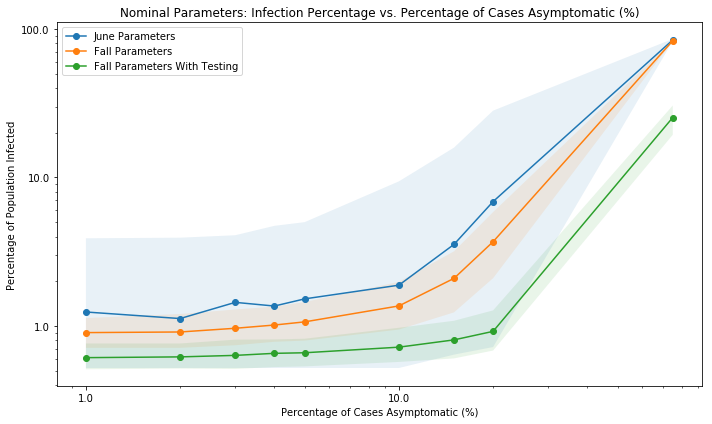

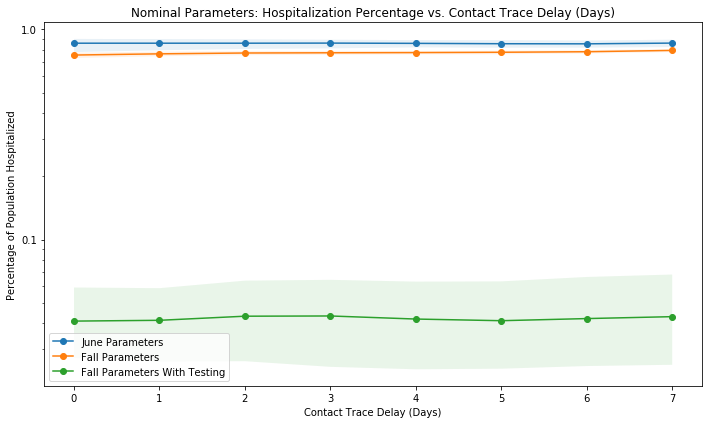

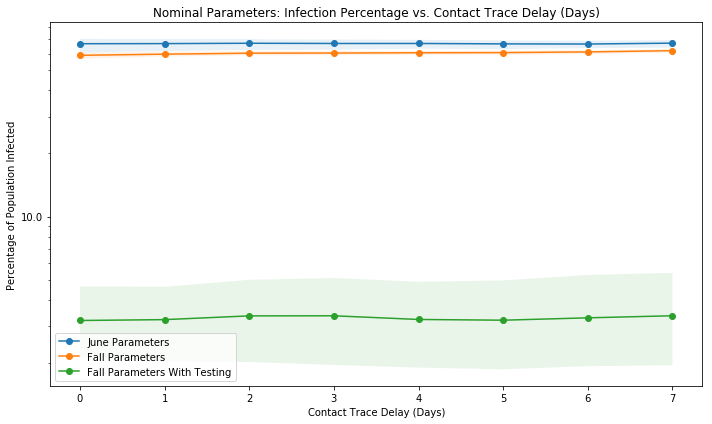

In [42]:


for new_label, sublabel in key_mapping.items():
    
    plot_many_dfs_quantiles({'June Parameters': sim_results[new_label][('june', 'nominal', 'notest')], 
                             'Fall Parameters': sim_results[new_label][('fall', 'nominal', 'notest')],
                             'Fall Parameters With Testing': sim_results[new_label][('fall', 'nominal', 'withtest')]}, 
                            cum_severe_quantiles,
                            normalize_params[sublabel], x_log_scale=plot_log_scale[sublabel],
                     xlabel=plot_labels[sublabel], ylabel="Percentage of Population Hospitalized",
                     title="Nominal Parameters: Hospitalization Percentage vs. {}".format(plot_labels[sublabel]), 
                               q_low=0.1, q_high=0.9, alpha=0.1, y_min = 0, y_max=5, y_log_scale=True,
                               savefig_name="may_30_figs/hospitalization_{}".format(sublabel), 
                             use_x_int_labels=use_x_int_labels[sublabel])
    
    plot_many_dfs_quantiles({'June Parameters': sim_results[new_label][('june', 'nominal', 'notest')], 
                             'Fall Parameters': sim_results[new_label][('fall', 'nominal', 'notest')],
                             'Fall Parameters With Testing': sim_results[new_label][('fall', 'nominal', 'withtest')]}, 
                            cum_infection_quantiles,
                            normalize_params[sublabel], x_log_scale=plot_log_scale[sublabel],
                     xlabel=plot_labels[sublabel], ylabel="Percentage of Population Infected",
                     title="Nominal Parameters: Infection Percentage vs. {}".format(plot_labels[sublabel]), 
                               q_low=0.1, q_high=0.9, alpha=0.1, y_min = 0, y_max=5, y_log_scale=True,
                               savefig_name="may_30_figs/infection_{}".format(sublabel), 
                             use_x_int_labels=use_x_int_labels[sublabel])

# make sensitivity plots for testing

In [ ]:
test_protocol_QFNR
test_population_fraction

In [18]:
sim_results['test_population_fraction'].keys()

dict_keys([('fall', 'nominal', 'withtest')])

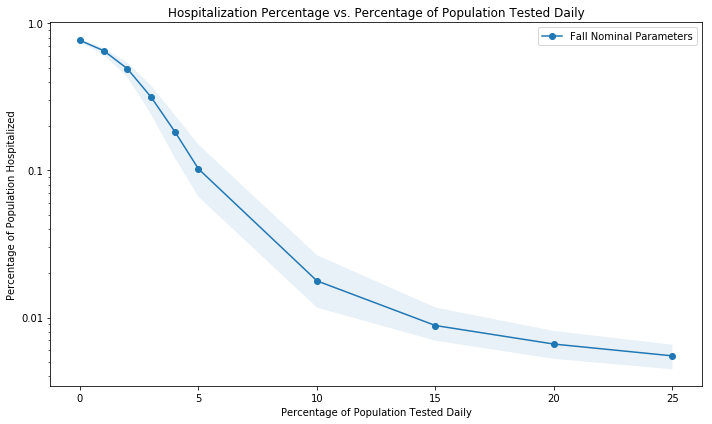

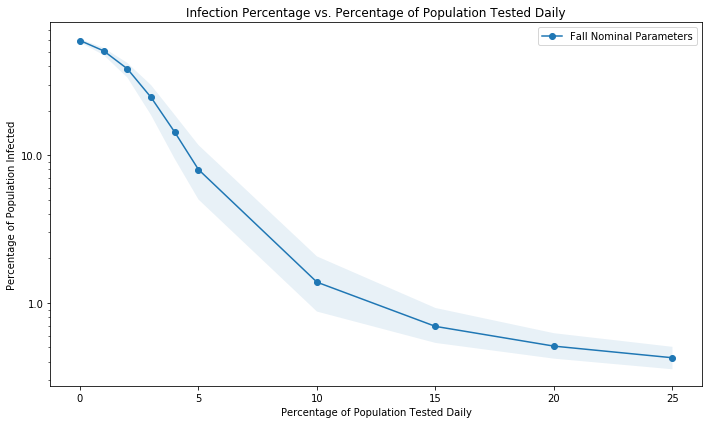

In [43]:
plot_many_dfs_quantiles({'Fall Nominal Parameters': sim_results['test_population_fraction'][('fall', 'nominal', 'withtest')], 
                     }, 
                            cum_severe_quantiles,
                            True, x_log_scale=False,
                     xlabel="Percentage of Population Tested Daily", ylabel="Percentage of Population Hospitalized",
                     title="Hospitalization Percentage vs. Percentage of Population Tested Daily", 
                               q_low=0.1, q_high=0.9, alpha=0.1, y_min = 0, y_max=5, y_log_scale=True,
                               savefig_name="may_30_figs/{}".format("hospitalization_testing_fraction"), 
                             use_x_int_labels=True)

plot_many_dfs_quantiles({'Fall Nominal Parameters': sim_results['test_population_fraction'][('fall', 'nominal', 'withtest')]}, 
                            cum_infection_quantiles,
                            True, x_log_scale=False,
                     xlabel="Percentage of Population Tested Daily", ylabel="Percentage of Population Infected",
                     title="Infection Percentage vs. Percentage of Population Tested Daily", 
                               q_low=0.1, q_high=0.9, alpha=0.1, y_min = 0, y_max=5, y_log_scale=True,
                               savefig_name="may_30_figs/{}".format("infection_testing_fraction"), 
                             use_x_int_labels=True)

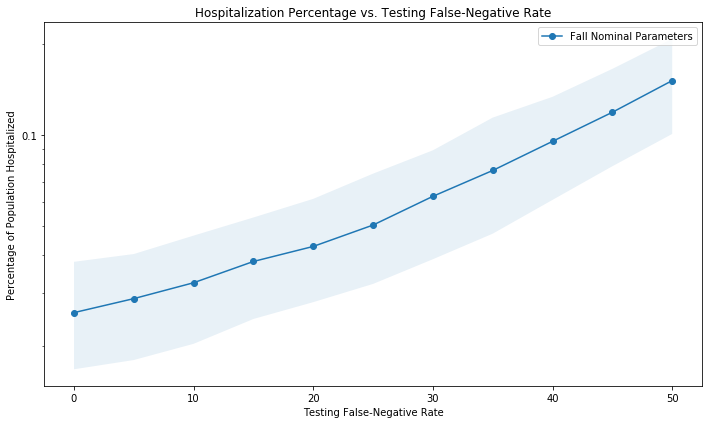

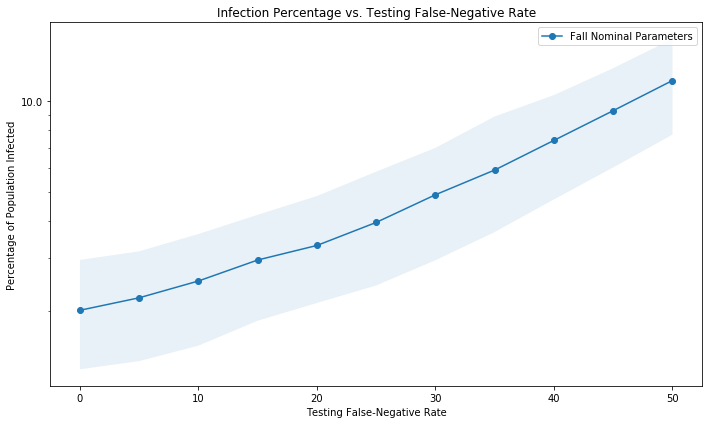

In [44]:
plot_many_dfs_quantiles({'Fall Nominal Parameters': sim_results['test_protocol_QFNR'][('fall', 'nominal', 'withtest')], 
                     }, 
                            cum_severe_quantiles,
                            True, x_log_scale=False,
                     xlabel="Testing False-Negative Rate", ylabel="Percentage of Population Hospitalized",
                     title="Hospitalization Percentage vs. Testing False-Negative Rate", 
                               q_low=0.1, q_high=0.9, alpha=0.1, y_min = 0, y_max=5, y_log_scale=True,
                               savefig_name="may_30_figs/{}".format("hospitalization_testing_qfnr"), 
                             use_x_int_labels=True)

plot_many_dfs_quantiles({'Fall Nominal Parameters': sim_results['test_protocol_QFNR'][('fall', 'nominal', 'withtest')],}, 
                            cum_infection_quantiles,
                            True, x_log_scale=False,
                     xlabel="Testing False-Negative Rate", ylabel="Percentage of Population Infected",
                     title="Infection Percentage vs. Testing False-Negative Rate", 
                               q_low=0.1, q_high=0.9, alpha=0.1, y_min = 0, y_max=5, y_log_scale=True,
                               savefig_name="may_30_figs/{}".format("infection_testing_qfnr"), 
                             use_x_int_labels=True)

In [28]:
a = """1590880404-fall-nominal-notest-severe_symptoms_daily_self_report_p
drwxrwxr-x  20 jmc678 pug-jmc678  4096 May 30 19:13 1590880404-fall-nominal-withtest-severe_symptoms_daily_self_report_p
drwxrwxr-x  20 jmc678 pug-jmc678  4096 May 30 19:13 1590880404-june-nominal-notest-severe_symptoms_daily_self_report_p
drwxrwxr-x  17 jmc678 pug-jmc678  4096 May 30 19:13 1590880404-june-nominal-notest-initial_ID_prevalence
drwxrwxr-x  17 jmc678 pug-jmc678  4096 May 30 19:13 1590880404-fall-nominal-withtest-initial_ID_prevalence
drwxrwxr-x   3 jmc678 pug-jmc678    57 May 30 19:13 1590880404-fall-pessimistic-withtest-mild_symptoms_daily_self_report_p
drwxrwxr-x   3 jmc678 pug-jmc678    57 May 30 19:13 1590880404-fall-nominal-notest-mild_symptoms_daily_self_report_p
drwxrwxr-x   3 jmc678 pug-jmc678    57 May 30 19:13 1590880404-fall-nominal-withtest-mild_symptoms_daily_self_report_p
drwxrwxr-x   3 jmc678 pug-jmc678    57 May 30 19:13 1590880404-fall-optimistic-notest-mild_symptoms_daily_self_report_p
drwxrwxr-x   3 jmc678 pug-jmc678    57 May 30 19:13 1590880404-fall-optimistic-withtest-mild_symptoms_daily_self_report_p
drwxrwxr-x   3 jmc678 pug-jmc678    57 May 30 19:13 1590880404-fall-pessimistic-notest-mild_symptoms_daily_self_report_p""".split('\n')

new_sim_dirs = [ls_output.split(' ')[-1] for ls_output in a]
for d in new_sim_dirs:
    print(d)

1590880404-fall-nominal-notest-severe_symptoms_daily_self_report_p
1590880404-fall-nominal-withtest-severe_symptoms_daily_self_report_p
1590880404-june-nominal-notest-severe_symptoms_daily_self_report_p
1590880404-june-nominal-notest-initial_ID_prevalence
1590880404-fall-nominal-withtest-initial_ID_prevalence
1590880404-fall-pessimistic-withtest-mild_symptoms_daily_self_report_p
1590880404-fall-nominal-notest-mild_symptoms_daily_self_report_p
1590880404-fall-nominal-withtest-mild_symptoms_daily_self_report_p
1590880404-fall-optimistic-notest-mild_symptoms_daily_self_report_p
1590880404-fall-optimistic-withtest-mild_symptoms_daily_self_report_p
1590880404-fall-pessimistic-notest-mild_symptoms_daily_self_report_p


In [30]:
new_sim_results = {}
for d in new_sim_dirs:
    parts = d.split('-')
    when = parts[1]
    assn = parts[2]
    tested = parts[3]
    var = parts[4]
    
    if var not in new_sim_results:
        new_sim_results[var] = {}
    
    new_sim_results[var][(when, assn, tested)] = load_sim_dir("/nfs01/covid_sims/" + d, verbose=False)
    print("done loading {}".format(d))

done loading 1590880404-fall-nominal-notest-severe_symptoms_daily_self_report_p
done loading 1590880404-fall-nominal-withtest-severe_symptoms_daily_self_report_p
done loading 1590880404-june-nominal-notest-severe_symptoms_daily_self_report_p
done loading 1590880404-june-nominal-notest-initial_ID_prevalence
done loading 1590880404-fall-nominal-withtest-initial_ID_prevalence
done loading 1590880404-fall-pessimistic-withtest-mild_symptoms_daily_self_report_p
done loading 1590880404-fall-nominal-notest-mild_symptoms_daily_self_report_p
done loading 1590880404-fall-nominal-withtest-mild_symptoms_daily_self_report_p
done loading 1590880404-fall-optimistic-notest-mild_symptoms_daily_self_report_p
done loading 1590880404-fall-optimistic-withtest-mild_symptoms_daily_self_report_p
done loading 1590880404-fall-pessimistic-notest-mild_symptoms_daily_self_report_p


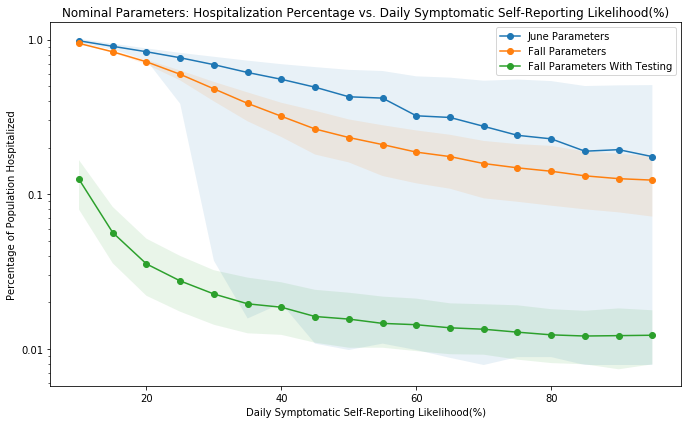

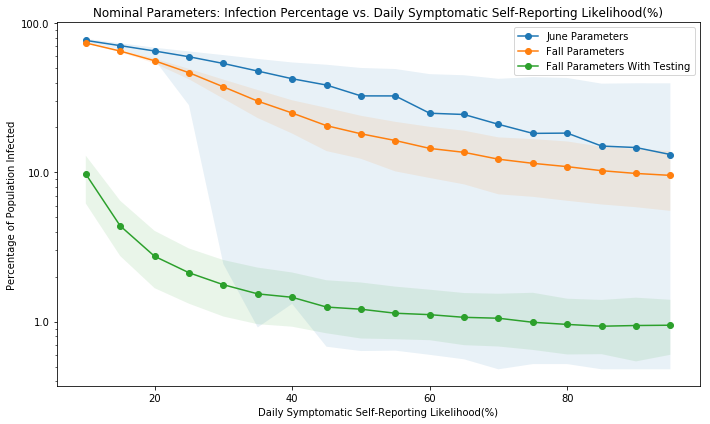

In [45]:


for new_label, sublabel in key_mapping.items():
    
    if new_label not in new_sim_results or new_label == 'mild_symptoms_daily_self_report_p' or new_label == 'initial_ID_prevalence':
        continue
    
    plot_many_dfs_quantiles({'June Parameters': new_sim_results[new_label][('june', 'nominal', 'notest')], 
                             'Fall Parameters': new_sim_results[new_label][('fall', 'nominal', 'notest')],
                             'Fall Parameters With Testing': new_sim_results[new_label][('fall', 'nominal', 'withtest')]}, 
                            cum_severe_quantiles,
                            normalize_params[sublabel], x_log_scale=plot_log_scale[sublabel],
                     xlabel=plot_labels[sublabel], ylabel="Percentage of Population Hospitalized",
                     title="Nominal Parameters: Hospitalization Percentage vs. {}".format(plot_labels[sublabel]), 
                               q_low=0.1, q_high=0.9, alpha=0.1, y_min = 0, y_max=5, y_log_scale=True,
                               savefig_name="may_30_figs/hospitalization_{}".format(sublabel), 
                             use_x_int_labels=use_x_int_labels[sublabel])
    
    plot_many_dfs_quantiles({'June Parameters': new_sim_results[new_label][('june', 'nominal', 'notest')], 
                             'Fall Parameters': new_sim_results[new_label][('fall', 'nominal', 'notest')],
                             'Fall Parameters With Testing': new_sim_results[new_label][('fall', 'nominal', 'withtest')]}, 
                            cum_infection_quantiles,
                            normalize_params[sublabel], x_log_scale=plot_log_scale[sublabel],
                     xlabel=plot_labels[sublabel], ylabel="Percentage of Population Infected",
                     title="Nominal Parameters: Infection Percentage vs. {}".format(plot_labels[sublabel]), 
                               q_low=0.1, q_high=0.9, alpha=0.1, y_min = 0, y_max=5, y_log_scale=True,
                               savefig_name="may_30_figs/infection_{}".format(sublabel), 
                             use_x_int_labels=use_x_int_labels[sublabel])

In [38]:
new_label

'initial_ID_prevalence'

In [50]:
new_sim_results['mild_symptoms_daily_self_report_p'].keys()

dict_keys([('fall', 'pessimistic', 'withtest'), ('fall', 'nominal', 'notest'), ('fall', 'nominal', 'withtest'), ('fall', 'optimistic', 'notest'), ('fall', 'optimistic', 'withtest'), ('fall', 'pessimistic', 'notest')])

In [49]:
def get_base_results(key):
    return new_sim_results['mild_symptoms_daily_self_report_p'][key]['mild_symptoms_daily_self_report_p-0']

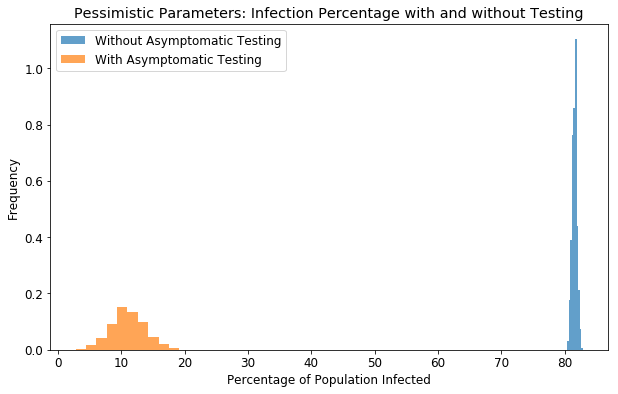

In [53]:
severities = extract_severities(get_base_results(('fall', 'pessimistic', 'notest')), hospitalizations_only=False)
severities_testing = extract_severities(get_base_results(('fall', 'pessimistic', 'withtest')), hospitalizations_only=False)
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))
plt.hist(severities, alpha=0.7, normed=True, label="Without Asymptomatic Testing")
plt.hist(severities_testing, alpha=0.7, label="With Asymptomatic Testing", normed=True)
plt.title("Pessimistic Parameters: Infection Percentage with and without Testing")
plt.legend(loc='best')
plt.xlabel("Percentage of Population Infected")
plt.ylabel("Frequency")
plt.savefig("/nfs01/covid_figs/may_30_figs/pessimistic_infection_hist.pdf")

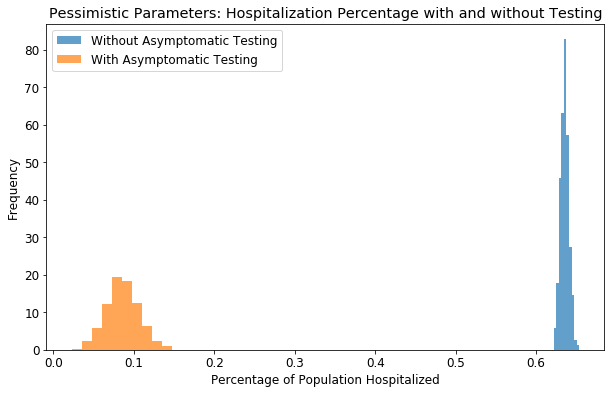

In [54]:
severities = extract_severities(get_base_results(('fall', 'pessimistic', 'notest')), hospitalizations_only=True)
severities_testing = extract_severities(get_base_results(('fall', 'pessimistic', 'withtest')), hospitalizations_only=True)
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))
plt.hist(severities, alpha=0.7, normed=True, label="Without Asymptomatic Testing")
plt.hist(severities_testing, alpha=0.7, label="With Asymptomatic Testing", normed=True)
plt.title("Pessimistic Parameters: Hospitalization Percentage with and without Testing")
plt.legend(loc='best')
plt.xlabel("Percentage of Population Hospitalized")
plt.ylabel("Frequency")
plt.savefig("/nfs01/covid_figs/may_30_figs/pessimistic_hospitalization_hist.pdf")

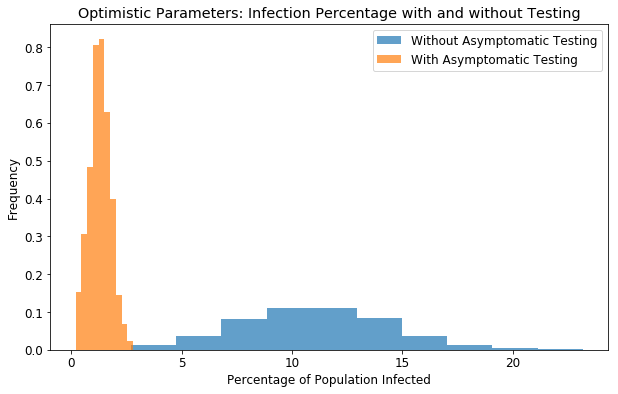

In [55]:
severities = extract_severities(get_base_results(('fall', 'optimistic', 'notest')), hospitalizations_only=False)
severities_testing = extract_severities(get_base_results(('fall', 'optimistic', 'withtest')), hospitalizations_only=False)
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))
plt.hist(severities, alpha=0.7, normed=True, label="Without Asymptomatic Testing")
plt.hist(severities_testing, alpha=0.7, label="With Asymptomatic Testing", normed=True)
plt.title("Optimistic Parameters: Infection Percentage with and without Testing")
plt.legend(loc='best')
plt.xlabel("Percentage of Population Infected")
plt.ylabel("Frequency")
plt.savefig("/nfs01/covid_figs/may_30_figs/optimistic_infection_hist.pdf")

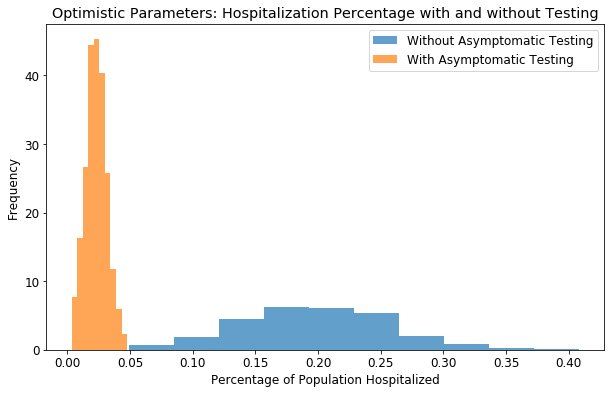

In [56]:
severities = extract_severities(get_base_results(('fall', 'optimistic', 'notest')), hospitalizations_only=True)
severities_testing = extract_severities(get_base_results(('fall', 'optimistic', 'withtest')), hospitalizations_only=True)
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))
plt.hist(severities, alpha=0.7, normed=True, label="Without Asymptomatic Testing")
plt.hist(severities_testing, alpha=0.7, label="With Asymptomatic Testing", normed=True)
plt.title("Optimistic Parameters: Hospitalization Percentage with and without Testing")
plt.legend(loc='best')
plt.xlabel("Percentage of Population Hospitalized")
plt.ylabel("Frequency")
plt.savefig("/nfs01/covid_figs/may_30_figs/optimistic_hospitalization_hist.pdf")

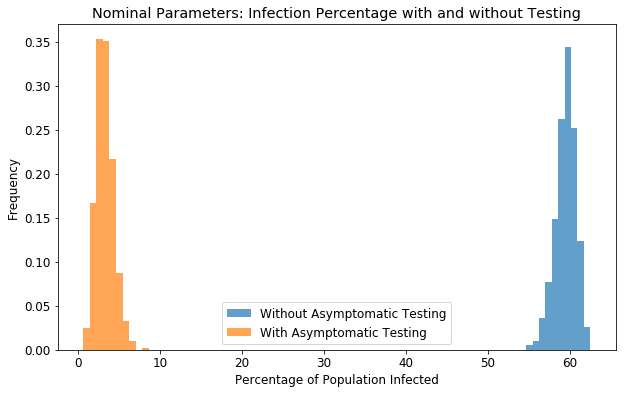

In [57]:
severities = extract_severities(get_base_results(('fall', 'nominal', 'notest')), hospitalizations_only=False)
severities_testing = extract_severities(get_base_results(('fall', 'nominal', 'withtest')), hospitalizations_only=False)
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))
plt.hist(severities, alpha=0.7, normed=True, label="Without Asymptomatic Testing")
plt.hist(severities_testing, alpha=0.7, label="With Asymptomatic Testing", normed=True)
plt.title("Nominal Parameters: Infection Percentage with and without Testing")
plt.legend(loc='best')
plt.xlabel("Percentage of Population Infected")
plt.ylabel("Frequency")
plt.savefig("/nfs01/covid_figs/may_30_figs/nominal_infection_hist.pdf")

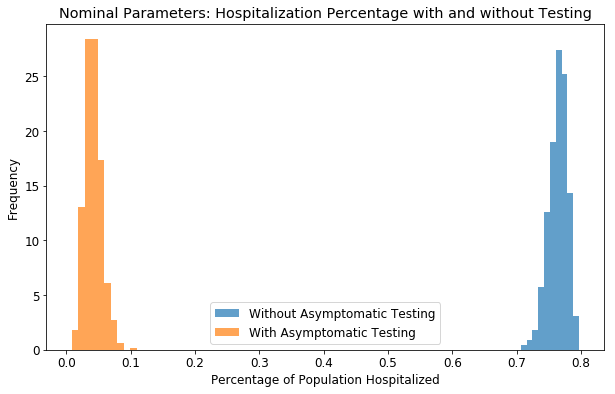

In [58]:
severities = extract_severities(get_base_results(('fall', 'nominal', 'notest')), hospitalizations_only=True)
severities_testing = extract_severities(get_base_results(('fall', 'nominal', 'withtest')), hospitalizations_only=True)
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))
plt.hist(severities, alpha=0.7, normed=True, label="Without Asymptomatic Testing")
plt.hist(severities_testing, alpha=0.7, label="With Asymptomatic Testing", normed=True)
plt.title("Nominal Parameters: Hospitalization Percentage with and without Testing")
plt.legend(loc='best')
plt.xlabel("Percentage of Population Hospitalized")
plt.ylabel("Frequency")
plt.savefig("/nfs01/covid_figs/may_30_figs/nominal_hospitalization_hist.pdf")

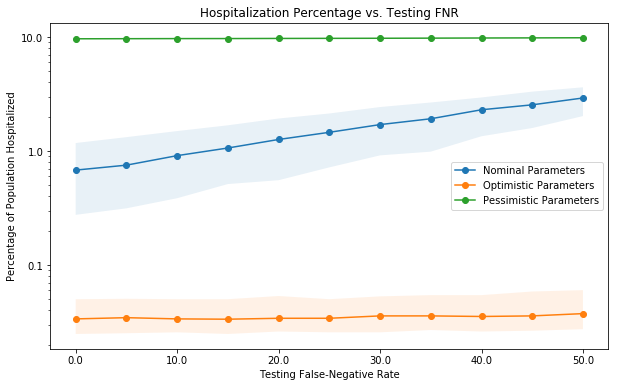

In [62]:
plot_many_dfs_quantiles({'Nominal Parameters': qfnr_results['realistic'], 
                             'Optimistic Parameters': qfnr_results['optimistic'],
                             'Pessimistic Parameters': qfnr_results['pessimistic']}, 
                            cum_severe_quantiles,
                            normalize_params[sublabel], x_log_scale=False,
                     xlabel="Testing False-Negative Rate", ylabel="Percentage of Population Hospitalized",
                     title="Hospitalization Percentage vs. Testing FNR", 
                               q_low=0.1, q_high=0.9, alpha=0.1, y_min = 0, y_max=5, y_log_scale=True,
                               savefig_name="may_26_figs/{}".format("testing_qfnr"), 
                             use_x_int_labels=False)

In [64]:
testing_fraction_dirs = [d for d in sim_dirs_ls_output if 'testing_fraction' in d]
qfnr_results = {}
for d in testing_fraction_dirs:
    formatted_d = d.split(' ')[-1]
    if 'realistic' in d:
        label = 'realistic'
    elif 'optimistic' in d:
        label = 'optimistic'
    elif 'pessimistic' in d:
        label = 'pessimistic'
    qfnr_results[label] = load_sim_dir("/nfs01/covid_sims/{}".format(formatted_d))
    print("done loading {}".format(formatted_d))

done loading test_population_fraction.0
done loading test_population_fraction.0.01
done loading test_population_fraction.0.02
done loading test_population_fraction.0.03
done loading test_population_fraction.0.04
done loading test_population_fraction.0.05
done loading test_population_fraction.0.1
done loading test_population_fraction.0.15
done loading test_population_fraction.0.2
done loading test_population_fraction.0.25
done loading testing_fraction_fall_slightly_pessimistic_testing.1590458500.7397447
done loading test_population_fraction.0
done loading test_population_fraction.0.01
done loading test_population_fraction.0.02
done loading test_population_fraction.0.03
done loading test_population_fraction.0.04
done loading test_population_fraction.0.05
done loading test_population_fraction.0.1
done loading test_population_fraction.0.15
done loading test_population_fraction.0.2
done loading test_population_fraction.0.25
done loading testing_fraction_fall_slightly_optimistic_testing.1590

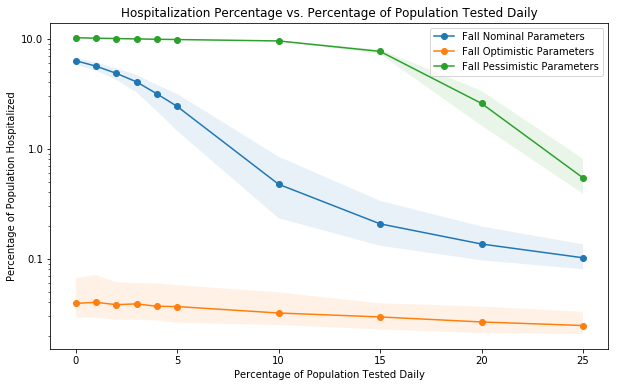

In [68]:
plot_many_dfs_quantiles({'Fall Nominal Parameters': qfnr_results['realistic'], 
                             'Fall Optimistic Parameters': qfnr_results['optimistic'],
                             'Fall Pessimistic Parameters': qfnr_results['pessimistic']}, 
                            cum_severe_quantiles,
                            normalize_params[sublabel], x_log_scale=False,
                     xlabel="Percentage of Population Tested Daily", ylabel="Percentage of Population Hospitalized",
                     title="Hospitalization Percentage vs. Percentage of Population Tested Daily", 
                               q_low=0.1, q_high=0.9, alpha=0.1, y_min = 0, y_max=5, y_log_scale=True,
                               savefig_name="may_26_figs/{}".format("testing_fraction"), 
                             use_x_int_labels=True)

# make histograms comparing testing vs. no testing

In [70]:
nominal_dirs = [d for d in sim_dirs_ls_output if 'mild' in d and 'fall' in d]

In [72]:
nominal_dirs = [d for d in sim_dirs_ls_output if 'mild' in d and 'fall' in d]
nominal_results = {}
for d in nominal_dirs:
    formatted_d = d.split(' ')[-1]
    if 'realistic' in d:
        label = 'realistic'
    elif 'optimistic' in d:
        label = 'optimistic'
    elif 'pessimistic' in d:
        label = 'pessimistic'
    
    if 'testing' in d:
        label = label + '_testing'
    
    nominal_results[label] = load_sim_dir("/nfs01/covid_sims/{}".format(formatted_d))
    print("done loading {}".format(formatted_d))

done loading mild_symptoms_daily_self_report_p.0
done loading mild_symptoms_daily_self_report_p.0.01
done loading mild_symptoms_daily_self_report_p.0.02
done loading mild_symptoms_daily_self_report_p.0.03
done loading mild_symptoms_daily_self_report_p.0.04
done loading mild_symptoms_daily_self_report_p.0.05
done loading mild_symptoms_daily_self_report_p.0.06
done loading mild_symptoms_daily_self_report_p.0.07
done loading mild_symptoms_daily_self_report_p.0.08
done loading mild_symptoms_daily_self_report_p.0.09
done loading mild_symptoms_daily_self_report_p.0.1
done loading mild_symptoms_daily_self_report_p.0.15
done loading mild_symptoms_daily_self_report_p.0.2
done loading mild_symptoms_daily_self_report_p.0.25
done loading mild_self_reporting_fall_slightly_pessimistic_testing.1590458500.748443
done loading mild_symptoms_daily_self_report_p.0
done loading mild_symptoms_daily_self_report_p.0.01
done loading mild_symptoms_daily_self_report_p.0.02
done loading mild_symptoms_daily_self_r

In [73]:
nominal_results['realistic'].keys()

dict_keys(['mild_symptoms_daily_self_report_p.0', 'mild_symptoms_daily_self_report_p.0.01', 'mild_symptoms_daily_self_report_p.0.02', 'mild_symptoms_daily_self_report_p.0.03', 'mild_symptoms_daily_self_report_p.0.04', 'mild_symptoms_daily_self_report_p.0.05', 'mild_symptoms_daily_self_report_p.0.06', 'mild_symptoms_daily_self_report_p.0.07', 'mild_symptoms_daily_self_report_p.0.08', 'mild_symptoms_daily_self_report_p.0.09', 'mild_symptoms_daily_self_report_p.0.1', 'mild_symptoms_daily_self_report_p.0.15', 'mild_symptoms_daily_self_report_p.0.2', 'mild_symptoms_daily_self_report_p.0.25'])

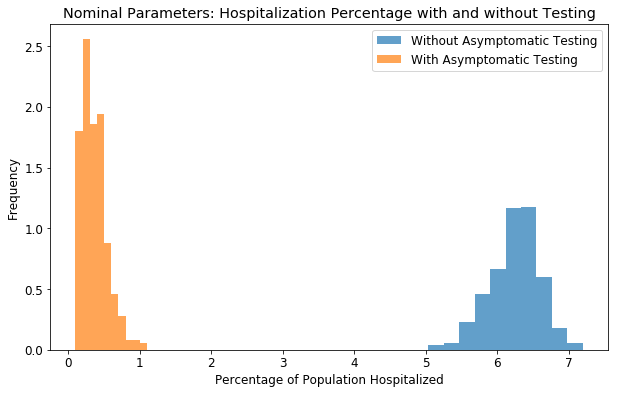

In [81]:
severities = extract_severities(nominal_results['realistic']['mild_symptoms_daily_self_report_p.0'])
severities_testing = extract_severities(nominal_results['realistic_testing']['mild_symptoms_daily_self_report_p.0'])
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))
plt.hist(severities, alpha=0.7, normed=True, label="Without Asymptomatic Testing")
plt.hist(severities_testing, alpha=0.7, label="With Asymptomatic Testing", normed=True)
plt.title("Nominal Parameters: Hospitalization Percentage with and without Testing")
plt.legend(loc='best')
plt.xlabel("Percentage of Population Hospitalized")
plt.ylabel("Frequency")
plt.savefig("/nfs01/covid_figs/nominal_hist.pdf")

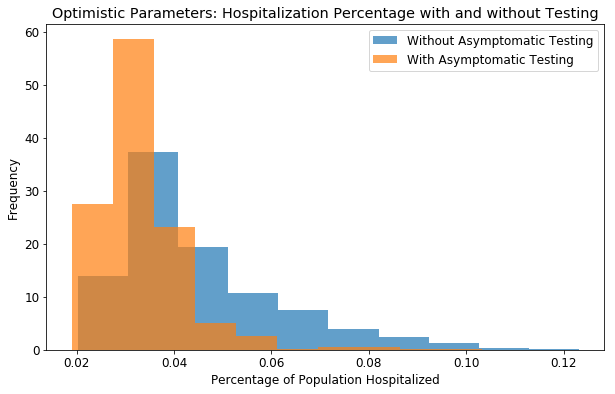

In [82]:
severities = extract_severities(nominal_results['optimistic']['mild_symptoms_daily_self_report_p.0'])
severities_testing = extract_severities(nominal_results['optimistic_testing']['mild_symptoms_daily_self_report_p.0'])
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))
plt.hist(severities, alpha=0.7, normed=True, label="Without Asymptomatic Testing")
plt.hist(severities_testing, alpha=0.7, label="With Asymptomatic Testing", normed=True)
plt.title("Optimistic Parameters: Hospitalization Percentage with and without Testing")
plt.legend(loc='best')
plt.xlabel("Percentage of Population Hospitalized")
plt.ylabel("Frequency")
plt.savefig("/nfs01/covid_figs/optimistic_hist.pdf")

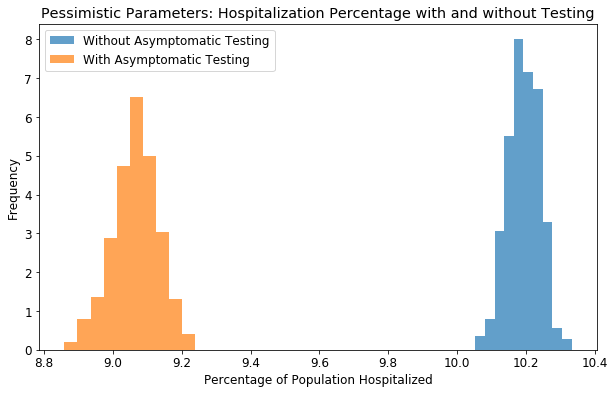

In [83]:
severities = extract_severities(nominal_results['pessimistic']['mild_symptoms_daily_self_report_p.0'])
severities_testing = extract_severities(nominal_results['pessimistic_testing']['mild_symptoms_daily_self_report_p.0'])
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))
plt.hist(severities, alpha=0.7, normed=True, label="Without Asymptomatic Testing")
plt.hist(severities_testing, alpha=0.7, label="With Asymptomatic Testing", normed=True)
plt.title("Pessimistic Parameters: Hospitalization Percentage with and without Testing")
plt.legend(loc='best')
plt.xlabel("Percentage of Population Hospitalized")
plt.ylabel("Frequency")
plt.savefig("/nfs01/covid_figs/pessimistic_hist.pdf")

# make plots for 'slightly optimistic' parameters

In [25]:
sim_results.keys()

dict_keys(['fall_slightly_pessimistic_testing', 'june_realistic', 'fall_slightly_optimistic', 'fall_slightly_pessimistic', 'june_slightly_optimistic_testing', 'june_slightly_optimistic', 'fall_realistic_testing', 'fall_realistic', 'june_slightly_pessimistic'])

In [28]:
sim_results['fall_slightly_optimistic_testing'] = {}
# the 'june' label was a typo when reading the dataframes
for key in sim_results['june_slightly_optimistic_testing']:
    true_key = key.split('_fall')[0]
    sim_results['fall_slightly_optimistic_testing'][true_key] = sim_results['june_slightly_optimistic_testing'][key]

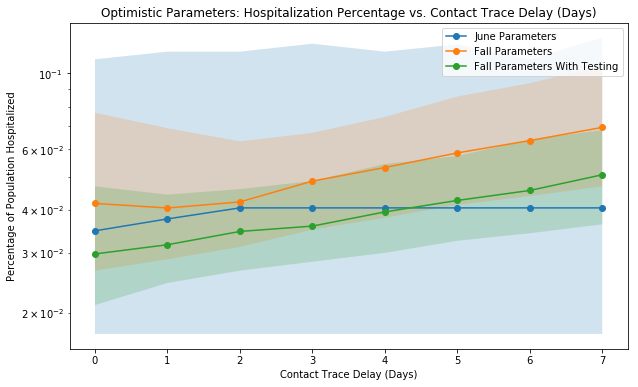

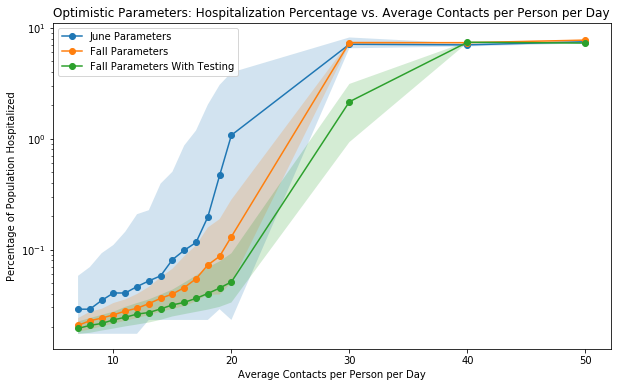

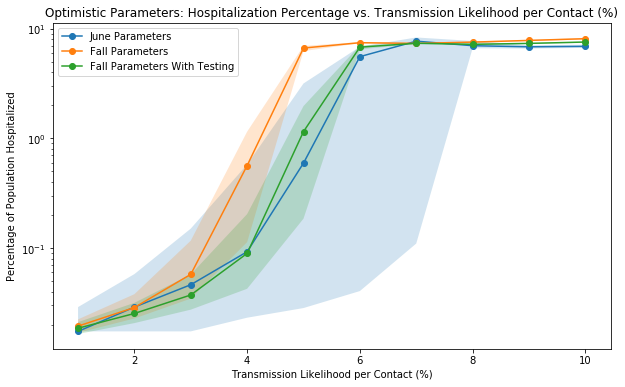

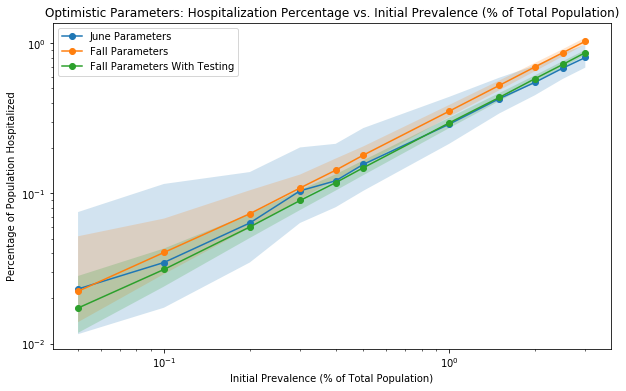

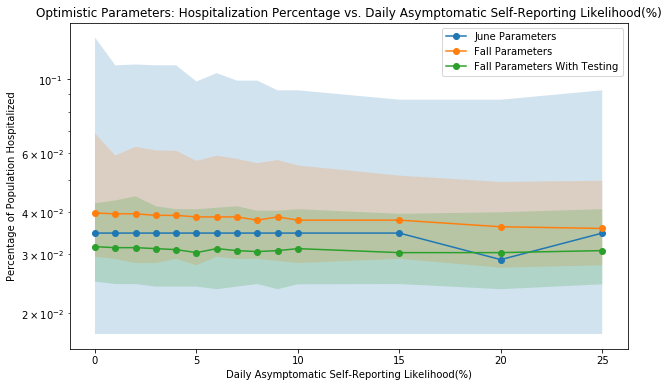

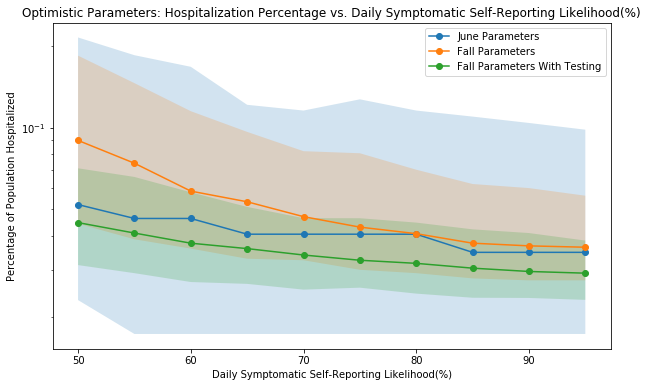

In [29]:
june = sim_results['june_slightly_optimistic']
fall = sim_results['fall_slightly_optimistic']
fall_testing = sim_results['fall_slightly_optimistic_testing'] 

for sublabel in sub_labels:
    
    plot_many_dfs_quantiles({'June Parameters': june[sublabel], 
                             'Fall Parameters': fall[sublabel],
                             'Fall Parameters With Testing': fall_testing[sublabel]}, 
                            cum_severe_quantiles,
                            normalize_params[sublabel], x_log_scale=plot_log_scale[sublabel],
                     xlabel=plot_labels[sublabel], ylabel="Percentage of Population Hospitalized",
                     title="Optimistic Parameters: Hospitalization Percentage vs. {}".format(plot_labels[sublabel]), 
                               q_low=0.1, q_high=0.9, alpha=0.2, y_min = 0, y_max=5, y_log_scale=True)

In [27]:
fall_testing.keys()

dict_keys(['daily_contacts_fall_slightly_optimistic_testing.1590458500.4155705', 'mild_self_reporting_fall_slightly_optimistic_testing.1590458500.407268', 'testing_qfnr_fall_slightly_optimistic_testing.1590458500.4193773', 'severe_self_reporting_fall_slightly_optimistic_testing.1590458500.420298', 'prevalence_fall_slightly_optimistic_testing.1590458500.4080658', 'testing_fraction_fall_slightly_optimistic_testing.1590458500.329604', 'contact_delay_fall_slightly_optimistic_testing.1590458500.4147923', 'exposed_infection_p_fall_slightly_optimistic_testing.1590458500.2070615', 'asymptomatic_p_fall_slightly_optimistic_testing.1590458500.4121659', 'contact_isolations_fall_slightly_optimistic_testing.1590458500.2080355'])

# and finally, plots for 'slightly pessimistic' parameters

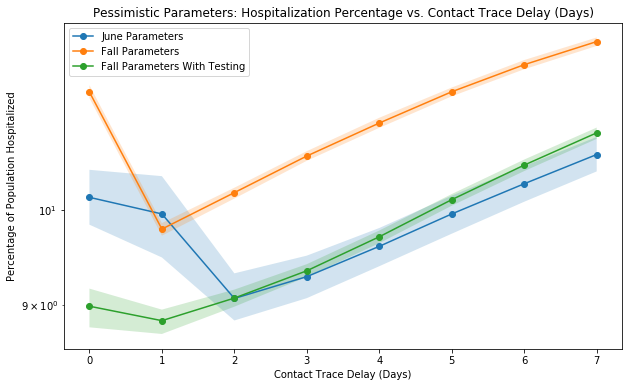

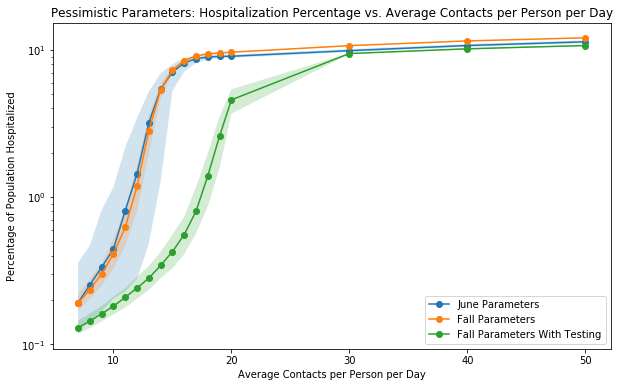

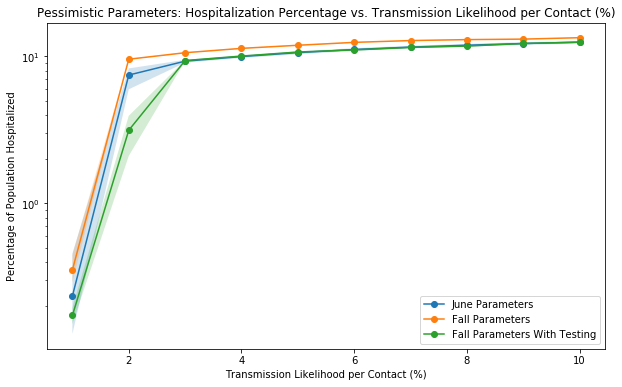

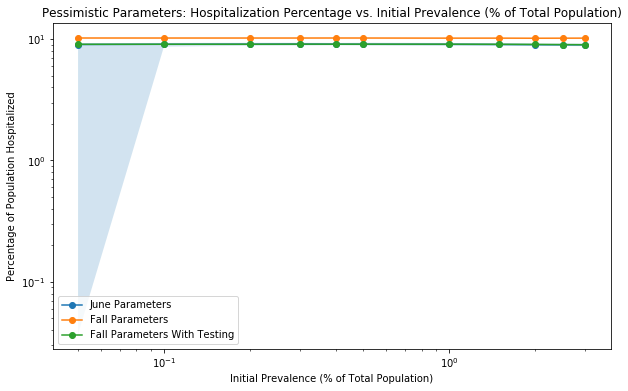

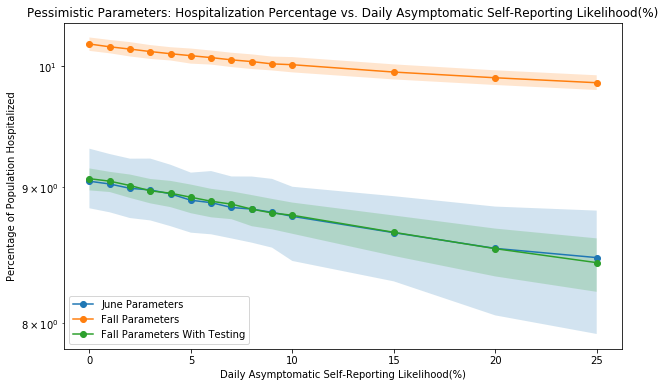

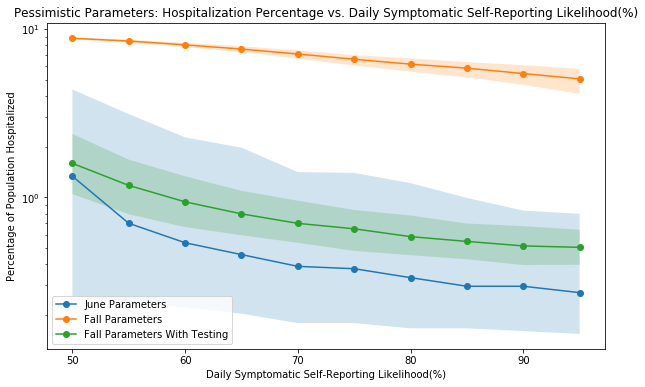

In [30]:
june = sim_results['june_slightly_pessimistic']
fall = sim_results['fall_slightly_pessimistic']
fall_testing = sim_results['fall_slightly_pessimistic_testing'] 

for sublabel in sub_labels:
    
    plot_many_dfs_quantiles({'June Parameters': june[sublabel], 
                             'Fall Parameters': fall[sublabel],
                             'Fall Parameters With Testing': fall_testing[sublabel]}, 
                            cum_severe_quantiles,
                            normalize_params[sublabel], x_log_scale=plot_log_scale[sublabel],
                     xlabel=plot_labels[sublabel], ylabel="Percentage of Population Hospitalized",
                     title="Pessimistic Parameters: Hospitalization Percentage vs. {}".format(plot_labels[sublabel]), 
                               q_low=0.1, q_high=0.9, alpha=0.2, y_min = 0, y_max=5, y_log_scale=True)

# fiddle with plotting

In [33]:
from matplotlib.ticker import StrMethodFormatter


            

def plot_many_dfs_quantiles_copy(sim_output_dict, yaxisfn, normalize_x_axis, x_log_scale=False, 
                            y_log_scale=False,
                            q_low=0.05, q_high=0.95, 
                            y_min = 0, y_max = 5,
                            ylabel="", xlabel="", title="", 
                            figsize=(10,6), alpha=0.1, 
                            color=None, savefig_name = None, 
                            use_x_int_labels=False, use_y_int_labels=False):
    # assn: yaxisfn(dfs) returns a tuple (q_low_val, avg, q_high_val)
    epsilon=1e-6
    plt.figure(figsize=figsize)
    if x_log_scale:
        plt.xscale("log")
    if y_log_scale:
        plt.yscale("log")
        #_, _, ymin, _ = plt.axis()
        #plt.ylim(bottom=max(1e-2, ymin))
    else:
        plt.ylim(y_min, y_max)
    
    for sim_label, sim_output in sim_output_dict.items():
        xs = []
        ys = []
        q_low_vals = []
        q_high_vals = []
        for sim_parameter_name, dfs in sim_output.items():
            # compute x-value assuming that sim_param_name is of form 'varied_param_name.value'
            param_val = float('.'.join(sim_parameter_name.split('.')[1:]))
            if normalize_x_axis:
                xs.append(param_val * 100)
            else:
                xs.append(param_val)
            # yaxisfn is a function that takes in a list of trajectory dataframes and
            # produces an output metric
            q_low_val, avg, q_high_val = yaxisfn(dfs, q_low, q_high)
            if not y_log_scale:
                ys.append(truncate(avg, y_min, y_max))
                q_low_vals.append(truncate(q_low_val, y_min, y_max))
                q_high_vals.append(truncate(q_high_val, y_min, y_max))
            else:
                ys.append(avg + epsilon)
                q_low_vals.append(q_low_val + epsilon)
                q_high_vals.append(q_high_val + epsilon)
        if color == None:
            plt.plot(xs, ys, marker='o', label=sim_label)
            plt.fill_between(xs, q_low_vals, q_high_vals, alpha=alpha)
        else:
            plt.plot(xs, ys, marker='o', label=sim_label, color=color)
            plt.fill_between(xs, q_low_vals, q_high_vals, alpha=alpha, color=color)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='best')
    if savefig_name:
        plt.savefig("/nfs01/covid_figs/" + savefig_name + ".pdf")
    
    ax=plt.gca()
    
    #ax.set_xscale('log')
    #ax.set_yscale('log')

    
    plt.draw()
    labels = ax.get_xmajorticklabels()
    new_labels = modify_tick_labels(labels, "x", use_x_int_labels)
    ax.set_xticklabels(new_labels)
    
    labels = ax.get_xminorticklabels()
    new_labels = modify_tick_labels(labels, "x", use_x_int_labels)
    ax.set_xticklabels(new_labels, minor=True)
    
    labels = ax.get_ymajorticklabels()
    new_labels = modify_tick_labels(labels, "y", use_y_int_labels)
    ax.set_yticklabels(new_labels)
    
    labels = ax.get_yminorticklabels()
    new_labels = modify_tick_labels(labels, "y", use_y_int_labels)
    ax.set_yticklabels(new_labels, minor=True)
    plt.show()

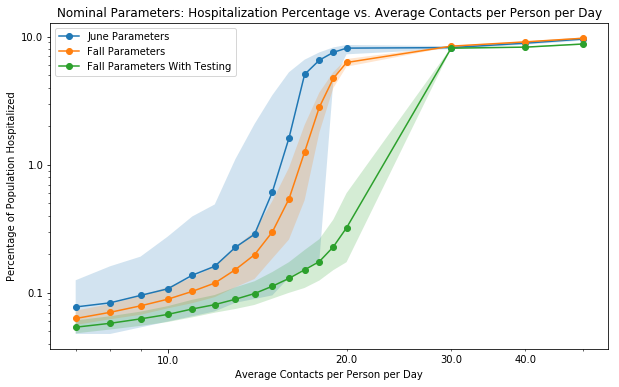

In [34]:
import matplotlib.ticker as mticker


june = sim_results['june_realistic']
fall = sim_results['fall_realistic']
fall_testing = sim_results['fall_realistic_testing']

for sublabel in ['daily_contacts']:
    
    plot_many_dfs_quantiles_copy({'June Parameters': june[sublabel], 
                             'Fall Parameters': fall[sublabel],
                             'Fall Parameters With Testing': fall_testing[sublabel]}, 
                            cum_severe_quantiles,
                            normalize_params[sublabel], x_log_scale=plot_log_scale[sublabel],
                     xlabel=plot_labels[sublabel], ylabel="Percentage of Population Hospitalized",
                     title="Nominal Parameters: Hospitalization Percentage vs. {}".format(plot_labels[sublabel]), 
                               q_low=0.1, q_high=0.9, alpha=0.2, y_min = 0, y_max=5, y_log_scale=True)

In [29]:
def modify_tick_labels(labels, axis, use_int_labels):
    assert(axis in ['x', 'y'])
    new_labels = []
    for label in labels:
        txt = label.get_text()
        if txt == '':
            new_labels.append('')
        else: 
            if axis == 'x':
                val = label._x
            else:
                val = label._y
            
            if use_int_labels:
                newtxt = str(int(val))
            else:
                newtxt = str(float(val))
            
            new_labels.append(newtxt)
    return new_labels
            